# Analysis of 2019 Horseshoe Lake SfM survey data

## These initial results were obtained using the Scott et al. (2018) parameters:

Window width = 50 m
Stride = 25 m
Maximum Displacement = 5 m

Scott et al. (2018): The M7 2016 Kumamoto, Japan, Earthquake: 3-D Deformation Along the Fault and Within the Damage Zone Constrained From Differential Lidar Topography

Load data:

In [1]:
import numpy as np
import pickle as p
import matplotlib.pylab as plt

filename = 'results/HSL2019/HSLSurveyComparison_window50_stride25.p'

(x,y,ux,uy,uz,residual) = p.load(open(filename,'rb'))

Residual values provide some measure of fit.  Our analysis should probably screen out points with high residuals.  Here is the spatial distribution of residuals:

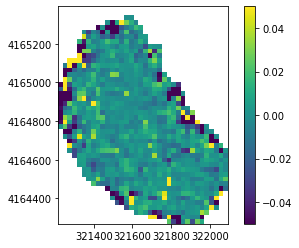

In [2]:
plt.figure()
plt.imshow(residual,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-5.0e-2,vmax=5.0e-2)
plt.colorbar()

Filter all points for which $\mid residual\mid > 0.05$ from ux, uy, uz:

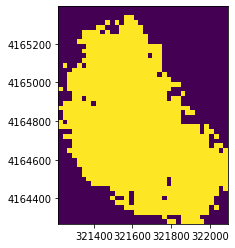

In [3]:
import copy
residual_mask = copy.deepcopy(residual)
residual_mask[np.isnan(residual)] = 5.0e10
mask = np.absolute(residual_mask) <= 5.0e-2
plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

Use this mask to remove high-residual values from ux, uy, uz:

In [4]:
ux[~mask] = np.nan
uy[~mask] = np.nan
uz[~mask] = np.nan

Plot map-view distribution of ux, uy, uz:

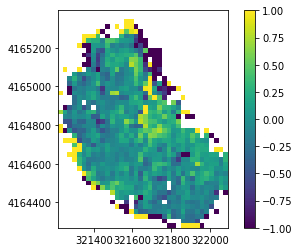

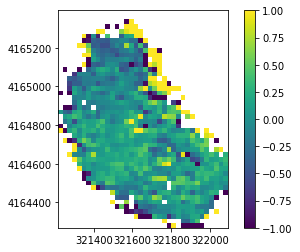

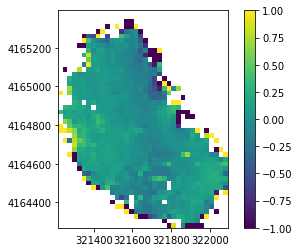

In [5]:
plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

The boundary effects here are clear, and so some masking will be necessary to meaningfully analyze the statistics.  Areas with no points were labeled with 0.0 in the original displacement grids.  We can erode the inverse of this by two pixels to eliminate boundary effects.  (As an aside, this may be a sensible protocol for real data processing as well).

Create mask:

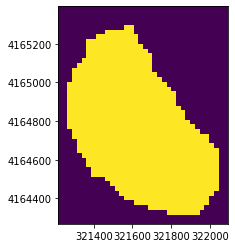

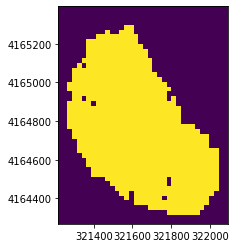

In [6]:
from scipy.ndimage.morphology import binary_erosion

mask_boundary = ~np.isnan(residual)
mask_boundary = binary_erosion(mask_boundary, iterations = 2)

mask = mask * mask_boundary

plt.figure()
plt.imshow(mask_boundary,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))


Mask displacements and plot:

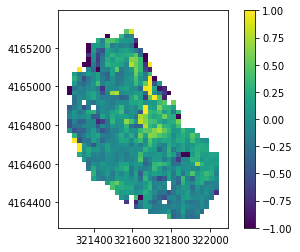

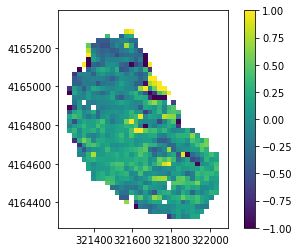

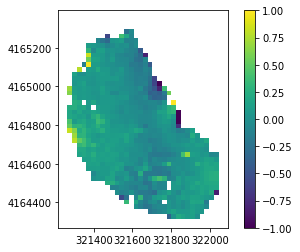

In [7]:
ux[np.where(mask != 1)] = np.nan
uy[np.where(mask != 1)] = np.nan
uz[np.where(mask != 1)] = np.nan

plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

Plot histograms, compute statistics:

Statistics:
-----------

Mean / Std of horizontal displacement:  0.41057379550997947 0.49154008504370206
Mean / Std of log10 horizontal displacement:  -0.5500529471192762 0.3665009325369563
Mean / Std of vertical displacement:  0.028363990974653447 0.27288297454740873


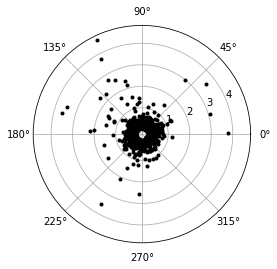

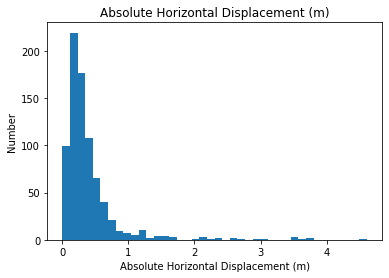

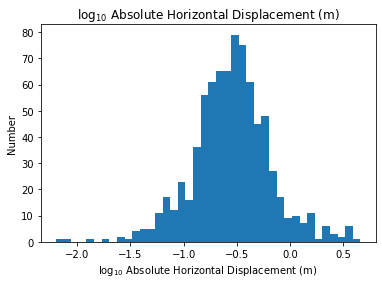

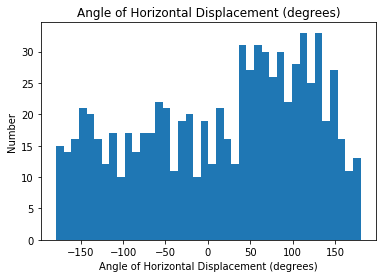

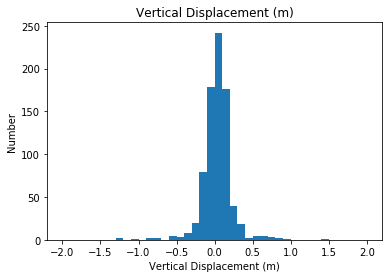

In [8]:
i = np.where(np.logical_and(~np.isnan(ux),~np.isnan(uy),~np.isnan(uz)))
theta = np.rad2deg(np.arctan2(uy[i],ux[i]))
r = np.sqrt(np.power(ux[i],2) + np.power(uy[i],2))
i = np.where(r <= 5.0)
theta = theta[i]
r = r[i]

plt.figure()
plt.polar(theta, r, 'k.')

plt.figure()
plt.hist(r,bins=40)
plt.title('Absolute Horizontal Displacement (m)')
plt.xlabel('Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(np.log10(r),bins=40)
plt.title('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.xlabel('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(theta,bins=40)
plt.title('Angle of Horizontal Displacement (degrees)')
plt.xlabel('Angle of Horizontal Displacement (degrees)')
plt.ylabel('Number')

plt.figure()
plt.hist(uz[~np.isnan(uz)],bins=40,range = (-2,2))
plt.title('Vertical Displacement (m)')
plt.xlabel('Vertical Displacement (m)')
plt.ylabel('Number')

print('Statistics:')
print('-----------')
print('')
print('Mean / Std of horizontal displacement: ', np.mean(r), np.std(r))
print('Mean / Std of log10 horizontal displacement: ', np.mean(np.log10(r)), np.std(np.log10(r)))
print('Mean / Std of vertical displacement: ', np.nanmean(uz), np.nanstd(uz))


## Next, we will repeat the analysis using a window with width = 25 m, stride = 12.5 m

In [9]:
filename = 'results/HSL2019/HSLSurveyComparison_window25_stride12_5.p'

(x,y,ux,uy,uz,residual) = p.load(open(filename,'rb'))

Residual values provide some measure of fit.  Our analysis should probably screen out points with high residuals.  Here is the spatial distribution of residuals:

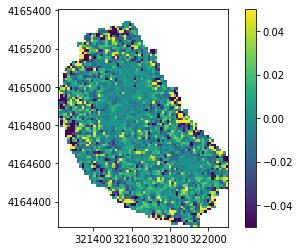

In [10]:
plt.figure()
plt.imshow(residual,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-5.0e-2,vmax=5.0e-2)
plt.colorbar()

Filter all points for which $\mid residual\mid > 0.05$ from ux, uy, uz:

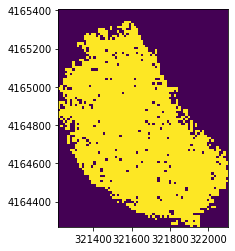

In [11]:
import copy
residual_mask = copy.deepcopy(residual)
residual_mask[np.isnan(residual)] = 5.0e10
mask = np.absolute(residual_mask) <= 5.0e-2
plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

Use this mask to remove high-residual values from ux, uy, uz:

In [12]:
ux[~mask] = np.nan
uy[~mask] = np.nan
uz[~mask] = np.nan

Plot map-view distribution of ux, uy, uz:

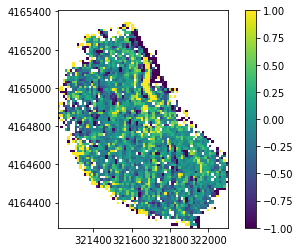

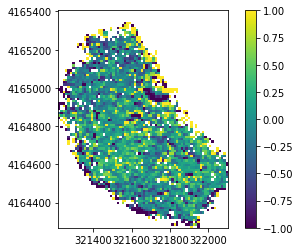

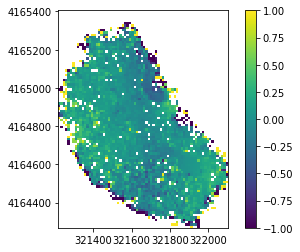

In [13]:
plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

The boundary effects here are clear, and so some masking will be necessary to meaningfully analyze the statistics.  Areas with no points were labeled with 0.0 in the original displacement grids.  We can erode the inverse of this by two pixels to eliminate boundary effects.  (As an aside, this may be a sensible protocol for real data processing as well).

Create mask:

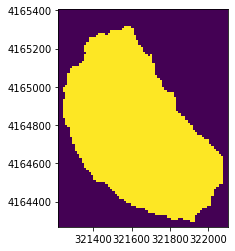

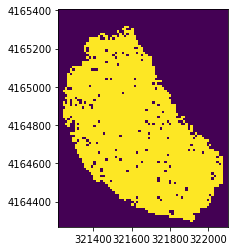

In [14]:
from scipy.ndimage.morphology import binary_erosion

mask_boundary = ~np.isnan(residual)
mask_boundary = binary_erosion(mask_boundary, iterations = 2)

mask = mask * mask_boundary

plt.figure()
plt.imshow(mask_boundary,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))


Mask displacements and plot:

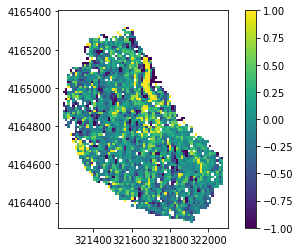

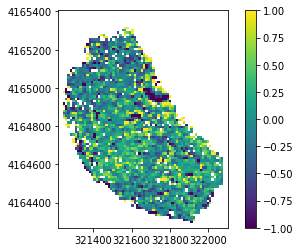

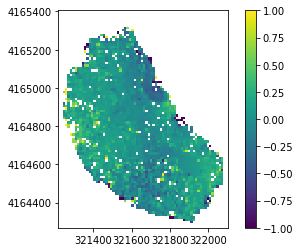

In [15]:
ux[np.where(mask != 1)] = np.nan
uy[np.where(mask != 1)] = np.nan
uz[np.where(mask != 1)] = np.nan

plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

Plot histograms, compute statistics:

Statistics:
-----------

Mean / Std of horizontal displacement:  0.6122506385444858 0.5967091942563698
Mean / Std of log10 horizontal displacement:  -0.362208331262456 0.3645586016699959
Mean / Std of vertical displacement:  0.02454798548087427 0.6850336766917167


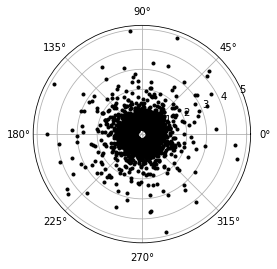

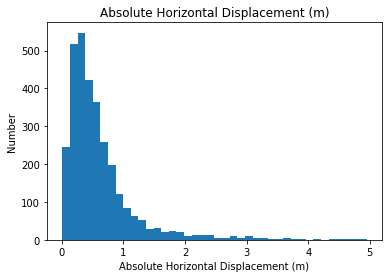

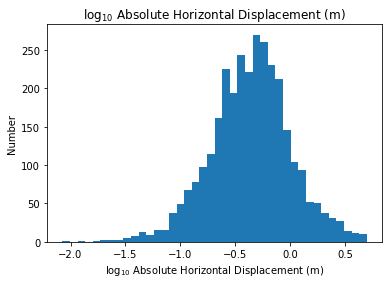

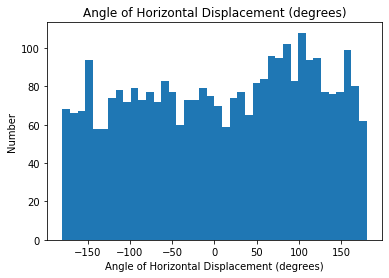

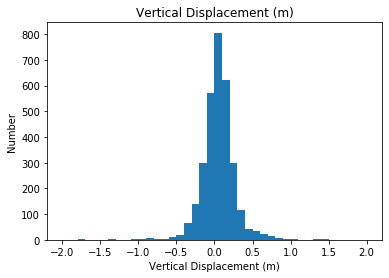

In [16]:
i = np.where(np.logical_and(~np.isnan(ux),~np.isnan(uy),~np.isnan(uz)))
theta = np.rad2deg(np.arctan2(uy[i],ux[i]))
r = np.sqrt(np.power(ux[i],2) + np.power(uy[i],2))
i = np.where(r <= 5.0)
theta = theta[i]
r = r[i]

plt.figure()
plt.polar(theta, r, 'k.')

plt.figure()
plt.hist(r,bins=40)
plt.title('Absolute Horizontal Displacement (m)')
plt.xlabel('Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(np.log10(r),bins=40)
plt.title('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.xlabel('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(theta,bins=40)
plt.title('Angle of Horizontal Displacement (degrees)')
plt.xlabel('Angle of Horizontal Displacement (degrees)')
plt.ylabel('Number')

plt.figure()
plt.hist(uz[~np.isnan(uz)],bins=40,range = (-2,2))
plt.title('Vertical Displacement (m)')
plt.xlabel('Vertical Displacement (m)')
plt.ylabel('Number')

print('Statistics:')
print('-----------')
print('')
print('Mean / Std of horizontal displacement: ', np.mean(r), np.std(r))
print('Mean / Std of log10 horizontal displacement: ', np.mean(np.log10(r)), np.std(np.log10(r)))
print('Mean / Std of vertical displacement: ', np.nanmean(uz), np.nanstd(uz))


## Finally, we will repeat the analysis using a window with width = 10 m, stride = 5 m

In [17]:
filename = 'results/HSL2019/HSLSurveyComparison_window10_stride5.p'

(x,y,ux,uy,uz,residual) = p.load(open(filename,'rb'))

Residual values provide some measure of fit.  Our analysis should probably screen out points with high residuals.  Here is the spatial distribution of residuals:

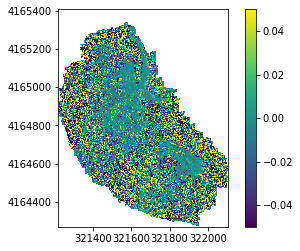

In [18]:
plt.figure()
plt.imshow(residual,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-5.0e-2,vmax=5.0e-2)
plt.colorbar()

Filter all points for which $\mid residual\mid > 0.05$ from ux, uy, uz:

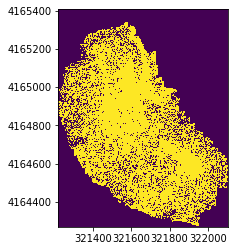

In [19]:
import copy
residual_mask = copy.deepcopy(residual)
residual_mask[np.isnan(residual)] = 5.0e10
mask = np.absolute(residual_mask) <= 5.0e-2
plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

Use this mask to remove high-residual values from ux, uy, uz:

In [20]:
ux[~mask] = np.nan
uy[~mask] = np.nan
uz[~mask] = np.nan

Plot map-view distribution of ux, uy, uz:

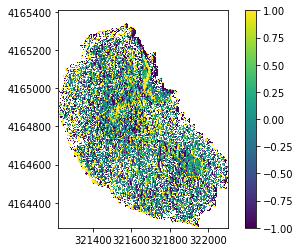

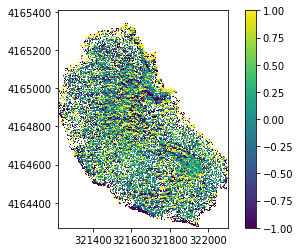

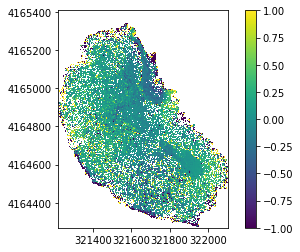

In [21]:
plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

The boundary effects here are clear, and so some masking will be necessary to meaningfully analyze the statistics.  Areas with no points were labeled with 0.0 in the original displacement grids.  We can erode the inverse of this by two pixels to eliminate boundary effects.  (As an aside, this may be a sensible protocol for real data processing as well).

Create mask:

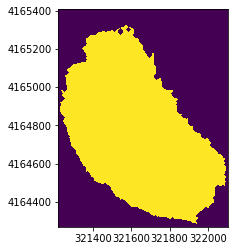

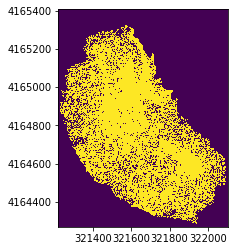

In [22]:
from scipy.ndimage.morphology import binary_erosion

mask_boundary = ~np.isnan(residual)
mask_boundary = binary_erosion(mask_boundary, iterations = 2)

mask = mask * mask_boundary

plt.figure()
plt.imshow(mask_boundary,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))


Mask displacements and plot:

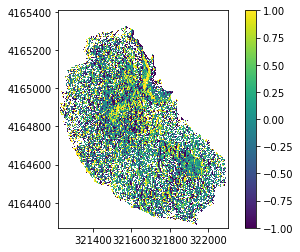

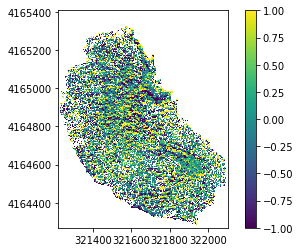

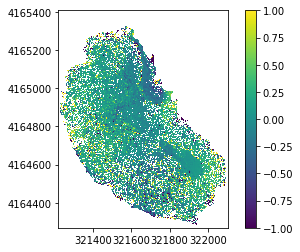

In [23]:
ux[np.where(mask != 1)] = np.nan
uy[np.where(mask != 1)] = np.nan
uz[np.where(mask != 1)] = np.nan

plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

Plot histograms, compute statistics.  Note that in the initial calculations, outliers in the vertical displacements dominated the statistics.  For this reason, I am discarding all values for which uz > 100 from the analysis.  I realize this is discrepant with the previous analyses, but is required to obtain meaningful statistics:

Statistics:
-----------

Mean / Std of horizontal displacement:  1.070152396112366 0.8703651477426709
Mean / Std of log10 horizontal displacement:  -0.10818886183453258 0.3674632280170828
Mean / Std of vertical displacement:  0.07166224888140038 0.8046813777445856


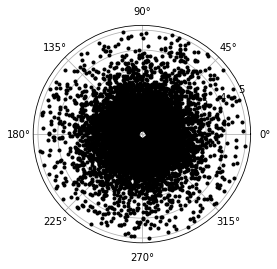

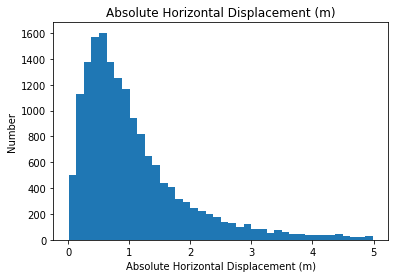

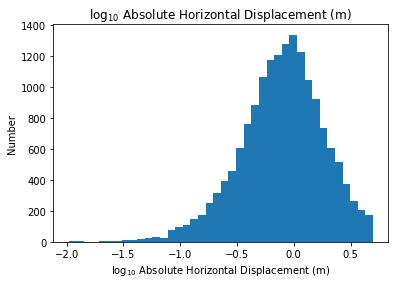

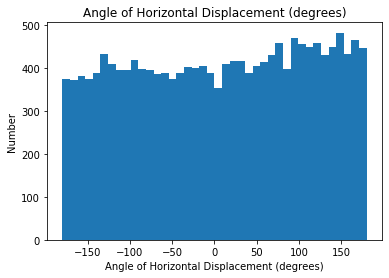

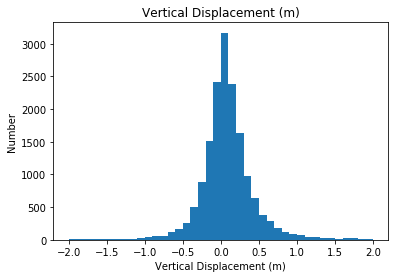

In [24]:
i = np.where(np.logical_and(~np.isnan(ux),~np.isnan(uy),~np.isnan(uz)))
theta = np.rad2deg(np.arctan2(uy[i],ux[i]))
r = np.sqrt(np.power(ux[i],2) + np.power(uy[i],2))
uz_stat = uz[i]
i = np.where(np.logical_and(r <= 5.0,np.abs(uz_stat < 100)))
theta = theta[i]
r = r[i]
uz_stat = uz_stat[i]
             
plt.figure()
plt.polar(theta, r, 'k.')

plt.figure()
plt.hist(r,bins=40)
plt.title('Absolute Horizontal Displacement (m)')
plt.xlabel('Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(np.log10(r),bins=40)
plt.title('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.xlabel('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(theta,bins=40)
plt.title('Angle of Horizontal Displacement (degrees)')
plt.xlabel('Angle of Horizontal Displacement (degrees)')
plt.ylabel('Number')

plt.figure()
plt.hist(uz_stat,bins=40,range = (-2,2))
plt.title('Vertical Displacement (m)')
plt.xlabel('Vertical Displacement (m)')
plt.ylabel('Number')

print('Statistics:')
print('-----------')
print('')
print('Mean / Std of horizontal displacement: ', np.mean(r), np.std(r))
print('Mean / Std of log10 horizontal displacement: ', np.mean(np.log10(r)), np.std(np.log10(r)))
print('Mean / Std of vertical displacement: ', np.nanmean(uz_stat), np.nanstd(uz_stat))
